In [5]:
!pip install logomaker

In [4]:
import tensorflow as tf
import numpy as np

import h5py, os, io
import requests as rq

from tfomics import moana, evaluate, impress
import matplotlib.pyplot as plt

In [10]:
data = rq.get('https://www.dropbox.com/s/c3umbo5y13sqcfp/synthetic_dataset.h5?raw=true')
data.raise_for_status()

with h5py.File(io.BytesIO(data.content), 'r') as dataset:
    x_train = np.array(dataset['X_train']).astype(np.float32).transpose([0, 2, 1])
    y_train = np.array(dataset['Y_train']).astype(np.float32)
    x_valid = np.array(dataset['X_valid']).astype(np.float32).transpose([0, 2, 1])
    y_valid = np.array(dataset['Y_valid']).astype(np.int32)
    x_test = np.array(dataset['X_test']).astype(np.float32).transpose([0, 2, 1])
    y_test = np.array(dataset['Y_test']).astype(np.int32)

print(y_test[0])

[0 1 0 0 0 0 0 0 0 0 0 0]


<ipython-input-7-35d7ecefd56f>:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  model = tf.keras.models.load_model(h5py.File(os.path.join('models', categories[i], models[j] + '.h5')))
c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(num_rows,num_cols,n+1)
c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 

c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(num_rows,num_cols,n+1)
c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(num_rows,num_cols,n+1)
c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(num_rows,num_cols,n+1)
c:\users\ghotr\appdata\local\programs\python\python38\lib\site-packages\tfomics\impress.py:31:

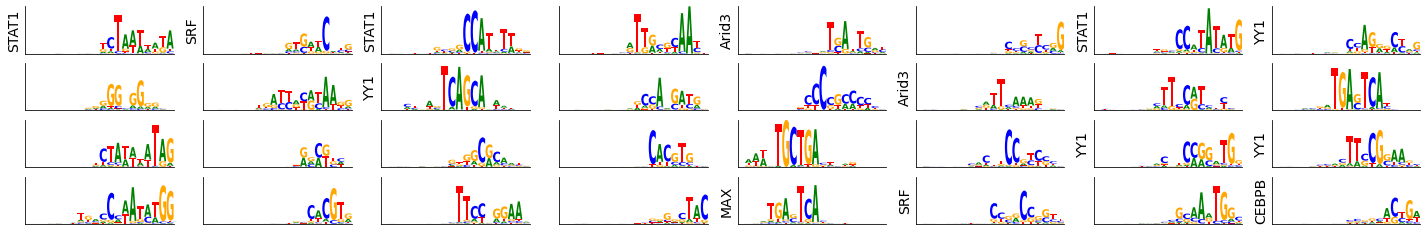

In [7]:
categories = [i for i in os.walk('results')][0][1]
for i in range(len(categories)):
    models = [i for i in os.walk(os.path.join('results', categories[i]))][0][1]
    for j in range(1, len(models)):
        num_filters = moana.count_meme_entries(os.path.join('motifs', categories[i], models[j] + '.meme'))
        motif_dir = os.path.join('results', categories[i], models[j], 'tomtom.tsv')
        
        motif_dir = 'results/pools/model-20/tomtom.tsv'
        
        match_frac, match_any, filter_matches, filter_qvalues, true_qvalues, true_hits = evaluate.motif_comparison_synthetic_dataset(motif_dir, num_filters=num_filters)
        
        model = tf.keras.models.load_model(h5py.File(os.path.join('models', categories[i], models[j] + '.h5')))
        ppms = moana.filter_activations(x_test, model, layer=3, window=20, threshold=0.5)
        fig = plt.figure(figsize=(25, 4))
        impress.plot_filters(ppms, fig, num_cols=8, names=filter_matches, fontsize=14)
        break
    break